In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import re
def parse_data(data):
    str_data  = re.findall(r"[-+]?(?:\d*\.*\d+)", data)
    return float(str_data[0])

In [10]:
file_name = "test_2.txt"
with open(file_name) as f:
    lines = f.readlines()
    
    log_file_list = list()
    for line in lines:
        if len(line.split(' ')) > 2:
            temp_ = list()
            for data in line.split('-')[2:]:
                temp_.append(parse_data(data))
            log_file_list.append(temp_)
            
    column_name = ['loss', 'loc_loss', 'conf_loss', 'loc_accuracy', 'conf_accuracy', 'val_loss', 'val_loc_loss', 'val_conf_loss', 'val_loc_accuracy', 'val_conf_accuracy']
    
    df = pd.DataFrame(log_file_list, columns = column_name)
    

ValueError: 10 columns passed, passed data had 12 columns

In [ ]:
df.tail(20)

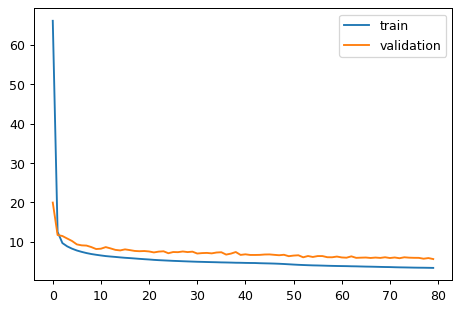

In [5]:
plt.figure(figsize = (6, 4), dpi = 90)
plt.plot(df['loss'], label = 'train')
plt.plot(df['val_loss'], label = 'validation')
plt.legend(loc = 'best')
plt.show()

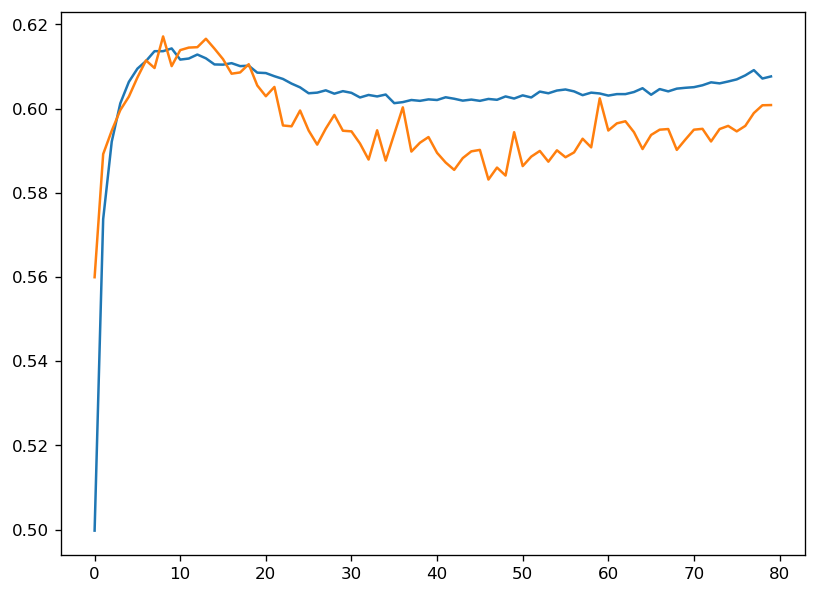

In [6]:
plt.figure(figsize = (8, 6), dpi = 120)
train_accuracy = list(map(lambda x, y: (x + y) / 2, df['loc_accuracy'], df['conf_accuracy']))
validation_accuracy = list(map(lambda x, y: (x + y) / 2, df['val_loc_accuracy'], df['val_conf_accuracy']))
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.show()